In [1]:
import pandas as pd
import re

In [2]:
from country_codes import *

In [3]:
df_ml = pd.read_csv('un_speeches.csv')
df_manual = pd.read_csv('quotations_1950-1979.csv')
df_manual['year'] = df_manual['year'].fillna(0)
df_manual['year'] = df_manual['year'].astype('int')

df = pd.concat([df_ml,df_manual])

In [4]:
df = df[ df['year'] > 0]

## Number of references for each category

In [5]:
categories = df['category'].unique()
print(categories)
years = df['year'].unique()

['m_cold_war' 'm_sovereignty_limited' 'm_specific_conflict'
 'm_non_interference' 'm_general_reference_to_foreign_policy'
 'm_colonialism' 'm_un_membership' 'm_un_mandate'
 'm_reference_to_state_leader' 'm_un_design' 'm_non_intervention'
 'm_specific_multilateral_agreement' 'm_historical_reference']


In [6]:
all_rows = []

for year in sorted(years):
    row = []
    row.append(year)
    df_year = df.query('year == {}'.format(year) )
    total = df.year.shape[0]
    for c in categories:
        df_year_category = df_year.query( 'category == "{}"'.format(c) )
        row.append(df_year_category.shape[0]/total) 
    #print(len(row))
    all_rows.append(row)
    
columns = ['year']
columns.extend(categories)

df_years = pd.DataFrame(all_rows,columns = columns )

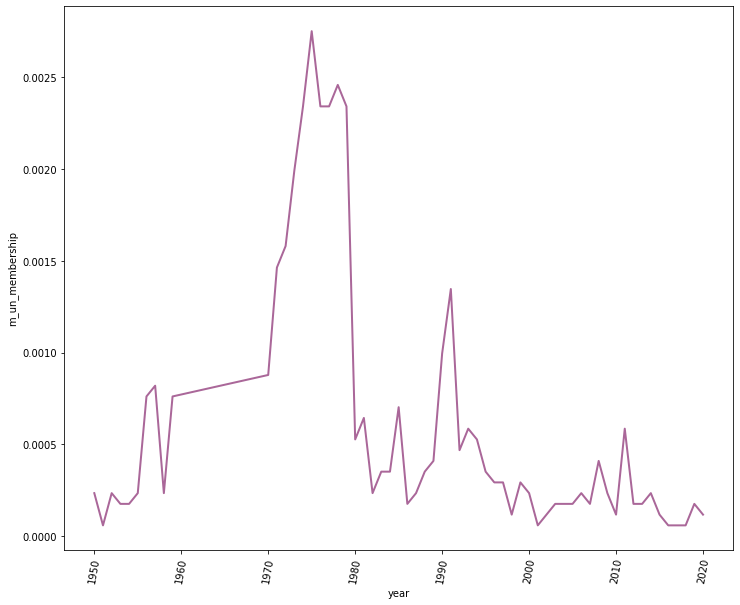

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure( figsize = ( 12, 10))
ax = sns.lineplot(data=df_years, x="year", y="m_un_membership", 
                  color= '#AA6799', linestyle='solid',linewidth=2 )
plt.xticks(rotation= 80)
plt.show()

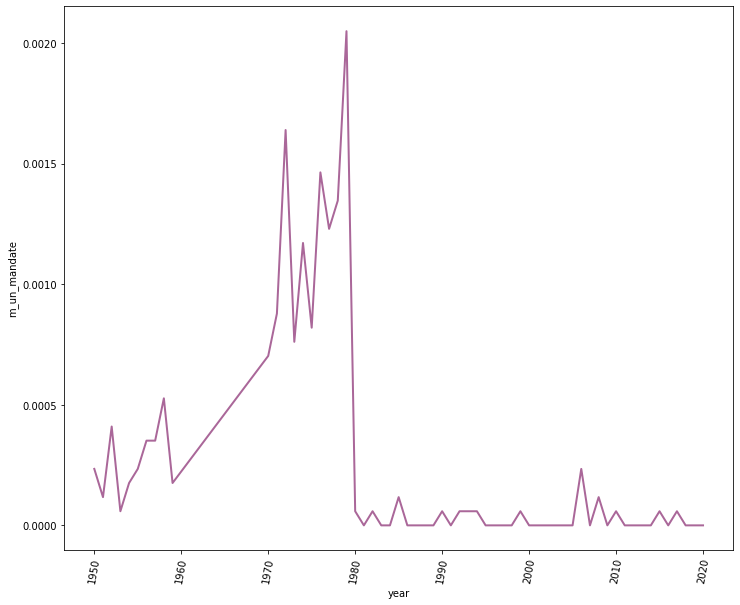

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure( figsize = ( 12, 10))
ax = sns.lineplot(data=df_years, x="year", y="m_un_mandate", 
                  color= '#AA6799', linestyle='solid',linewidth=2 )
plt.xticks(rotation= 80)
plt.show()

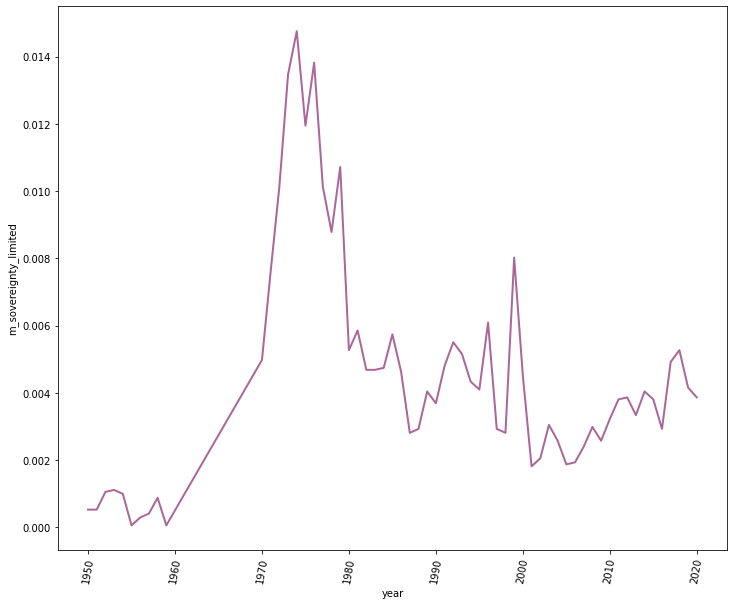

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure( figsize = ( 12, 10))
ax = sns.lineplot(data=df_years, x="year", y="m_sovereignty_limited", 
                  color= '#AA6799', linestyle='solid',linewidth=2 )
plt.xticks(rotation= 80)
plt.show()

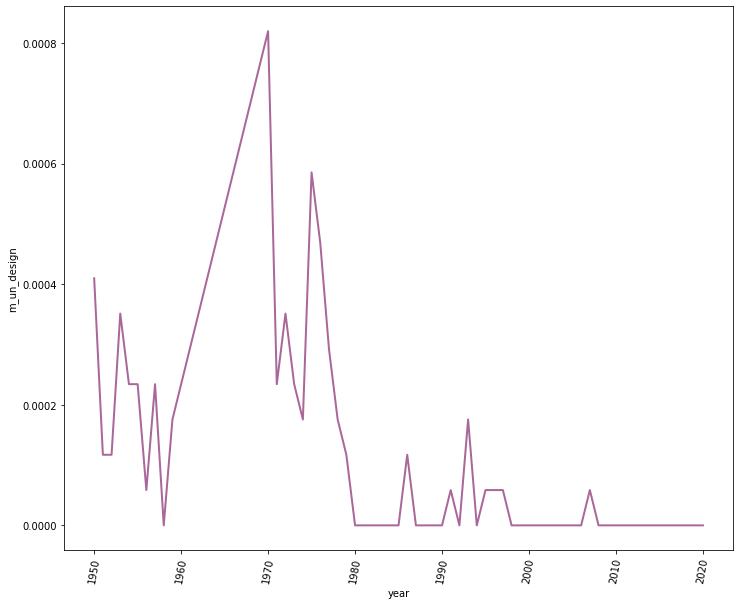

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure( figsize = ( 12, 10))
ax = sns.lineplot(data=df_years, x="year", y="m_un_design", 
                  color= '#AA6799', linestyle='solid',linewidth=2 )
plt.xticks(rotation= 80)
plt.show()

## Security Council

In [11]:
## US, Russia, China, France and UK
# Should USSR be included?
security_council = ['USA','RUS','FRA','GBR','CHN']

In [12]:
categories = df['category'].unique()
print(categories)
years = df['year'].unique()

all_rows = []

for category in sorted(categories):
    row = []
    df_category = df.query('category == "{}" '.format(category) )
    df_category_sc = df_category[ df_category['country'].isin(security_council ) ]
    row.append(category)
    total = df_category.shape[0]
    row.append(df_category.shape[0])
    row.append( (df_category.shape[0]-df_category_sc.shape[0])/total)
    row.append( df_category_sc.shape[0]/total )
    all_rows.append(row)

df_sc = pd.DataFrame(all_rows,columns=['category','total','other','sc'])

['m_cold_war' 'm_sovereignty_limited' 'm_specific_conflict'
 'm_non_interference' 'm_general_reference_to_foreign_policy'
 'm_colonialism' 'm_un_membership' 'm_un_mandate'
 'm_reference_to_state_leader' 'm_un_design' 'm_non_intervention'
 'm_specific_multilateral_agreement' 'm_historical_reference']


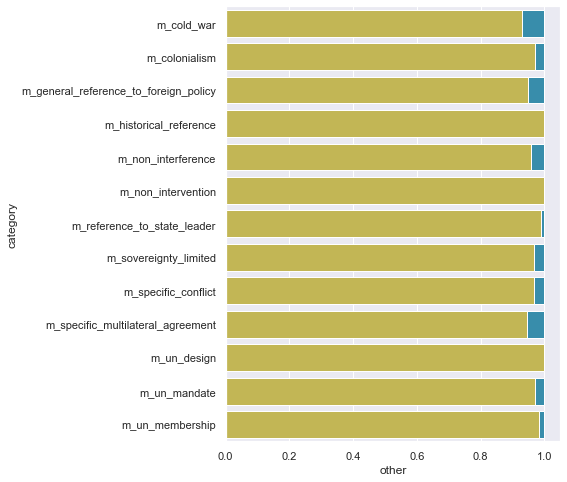

In [13]:


sns.set(rc={'figure.figsize':(6,8)})
df_sc['combined'] = df_sc['sc'] + df_sc['other']

bar_plot1 = sns.barplot(y='category', x='combined', data=df_sc, label="Y1", color='#2596BE')
bar_plot2 = sns.barplot(y='category', x='other', data=df_sc, label="Y2", color='#D4C443')
plt.show()

## Regions

In [14]:
import numpy as np

def find_region(country_code):
    if country_code in regions:
        return regions[country_code]
    else:
        print(country_code)
        return np.nan
        

df = df[df['country'].notna()]

In [15]:
df['region'] = df['country'].apply(find_region)
df = df[df['region'].notna()]

CSR
FPR
CRS
PAR
PAR
PAR
PAR
PAR
PAR
PAR
UKRSSR
UKRSSR
CSR
CSR
CSR
UKRSSR
UKRSSR
CSR
CSR
CSR
CSR
UKRSSR
UKRSSR
UKRSSR
UAR
UAR
SFR
SFR
SFR
SFR
SFR
UKRSSR
NCI
NCI
NCI
ESO
ESO
ESO
SFR
SFR
SFR
UKRSSR
SFR
UKRSSR
UKRSSR
UKRSSR
SFR
SFR
SFR
SFR
SFR
SFR
SFR
GDR
GDR
GDR
GDR
GDR
GDR
GDR
GDR
SFR
SFR
CSR
CSR
CSR
UKRSSR
UKRSSR
UKRSSR
UKRSSR
CSR
ZRE
ZRE
SUN
SUN
SUN
SUN
DHY
DHY
BYS
BYS
BYS
BYS
BYS
BYS
SUN
SUN
UKRSSR
UKRSSR
UKRSSR
BYS
BYS
BYS
BYS
SUN
SUN
ZAR
BYS
BYS
BYS
BYS
ZAR
SUN
SUN
UKRSSR
UKRSSR
KWT (2)
KWT (2)
KWT (2)
CSR
CSR
MAR (2)
MAR (2)
MAR (2)
MAR (2)
MAR (2)
MAR (2)
MAR (2)
MAR (2)
MAR (2)
VNM (2)
VNM (2)
VNM (2)
VNM (2)
VNM (2)
VNM (2)
VNM (2)
VNM (2)
VNM (2)
VNM (2)
VNM (2)
VNM (2)
VNM (2)
VNM (2)
VNM (2)
VNM (2)
VNM (2)
GNB (2)
GNB (2)
GNB (2)
BYS
BYS
ZAR
ZAR
ZAR
ZAR
SUN
SUN
UKRSSR
UKRSSR
UKRSSR
BYS
SUN
SUN
PERU
SUN
SUN
BYS
SUN
SUN
SUN
SUN
SUN
SUN
SUN
UKRSSR
BYS
BYS
SUN
SUN
SUN
BUR
BUR
BYS
SUN
SUN
SUN


In [16]:
unique_regions = list(set(regions.values()))
print(unique_regions)

['Africa', 'Asia', 'South America', 'Oceania', 'Europe', 'Northern America', 'Latin America and the Caribbean', 'Central America']


In [17]:
from collections import Counter
categories = df['category'].unique()
print(categories)
years = df['year'].unique()

all_rows = []

for category in sorted(categories):
    row = []
    df_category = df.query('category == "{}" '.format(category) )
    region_count = Counter(df_category['region'])
    row.append(category)
    total = df_category.shape[0]
    #row.append(total)
    for region in unique_regions:
        row.append( region_count.get(region,0)/total )
        
    all_rows.append(row)


    
columns = ['category']
columns.extend(unique_regions)

df_region = pd.DataFrame(all_rows,columns=columns)

['m_cold_war' 'm_sovereignty_limited' 'm_specific_conflict'
 'm_non_interference' 'm_general_reference_to_foreign_policy'
 'm_colonialism' 'm_un_membership' 'm_un_mandate'
 'm_reference_to_state_leader' 'm_un_design' 'm_non_intervention'
 'm_specific_multilateral_agreement' 'm_historical_reference']


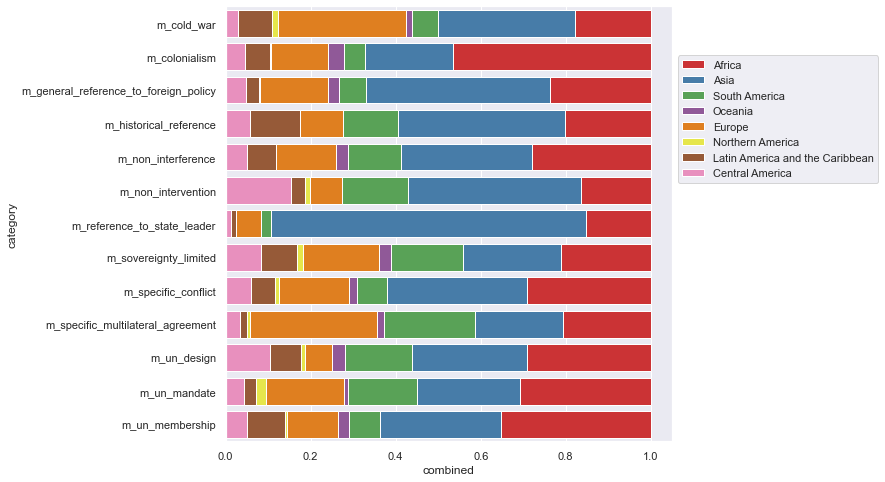

In [18]:
colours = sns.color_palette("Set1", n_colors= len(unique_regions) )


sns.set(rc={'figure.figsize':(8,8)})

df_region['combined'] = df_region['Europe']+df_region['Oceania']+df_region['Latin America and the Caribbean']+df_region['Asia']+df_region['Northern America']+df_region['Africa']+df_region['South America']+df_region['Central America']
    
for key in range(0,len(unique_regions)):
    region = unique_regions[key]
    bar_plot = sns.barplot(y='category', x='combined', data=df_region, color= colours[key] ,label = region ) 
    df_region['combined'] = df_region['combined'] - df_region[region]

bar_plot.legend(bbox_to_anchor=(1.0, 0.9))

plt.show()
